### Chapter 1.3 국가별 음주 데이터 분석 

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
drinks = pd.read_csv('data/drinks.csv')
print(drinks.shape)
drinks.head()

(193, 6)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [41]:
## correlation : beer and wine 
corr1 = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr1

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [42]:
cols = drinks.columns[1:5]
corr2 = drinks[cols].corr(method = 'pearson')
corr2

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


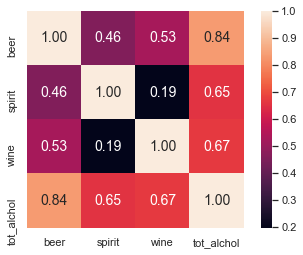

In [43]:
## heatmap chart 
cols_view = [ 'beer', 'spirit', 'wine', 'tot_alchol' ]

heat_map = sns.heatmap(corr2.values,
                                cbar = True, annot = True, square = True, fmt = '.2f', 
                                annot_kws = {'size':14}, 
                                xticklabels= cols_view, yticklabels= cols_view )
                    
plt.show()                    

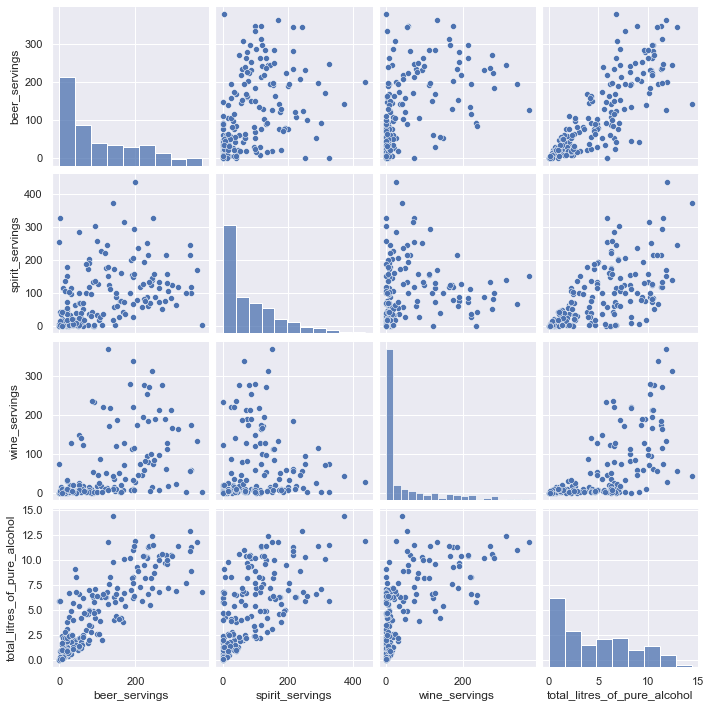

In [44]:
## scatter chart 
sns.pairplot(drinks[cols])

In [45]:
## 결측치 처리 
drinks.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [61]:
## continent에 존재하는 23개 결측치를 OT(others)로 바꿔준다. 
drinks['continent'] = drinks['continent'].fillna('OT')

print(drinks.isnull().sum())
print('--------------------------------------------------------')
print(drinks['continent'].value_counts())

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64
--------------------------------------------------------
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64


In [66]:
## 대륙별로 독한 술 소비가 어떻게 다른지 알아보자 
spirit_by_continent = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
spirit_by_continent

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


In [76]:
avg_tot = drinks['total_litres_of_pure_alcohol'].mean()
avg_continent = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

print('Average of Total = ', round(avg_tot,2))
print('-------------------------------------------------------')
print('Average by Continents = ', round(avg_continent,2))

Average of Total =  4.72
-------------------------------------------------------
Average by Continents =  continent
AF    3.01
AS    2.17
EU    8.62
OC    3.38
OT    6.00
SA    6.31
Name: total_litres_of_pure_alcohol, dtype: float64


<AxesSubplot:xlabel='continent'>

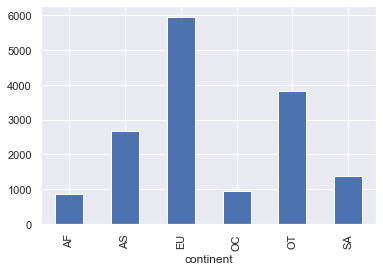

In [88]:
## 대륙별 각 주종의 소비량을 시각화 
#x = 'beer_servings'
x = 'spirit_servings'
#x = 'wine_servings'
#x = 'total_litres_of_pure_alcohol'

sum_continent = drinks.groupby('continent')[x].sum()
sum_continent.plot(kind = 'bar')

In [101]:
## t-test : 아프리카 vs 유럽의 맥주소비량 차이 검정 
from scipy import stats 

africa = drinks[drinks['continent'] == 'AF']
europe = drinks[drinks['continent'] == 'EU']

ttest_1 = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
ttest_2 = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var = False)

print('등분산 가정시 : ', ttest_1)
print('등분산 비 가정시 : ', ttest_2)

## 예쁘게 ... 
print('등분산 가정시 : ', 'Stats = %.3f  &  P-value = %.3f'  % ttest_1)
print('등분산 가정시 : ', 'Stats = %.3f  &  P-value = %.3f'  % ttest_2)

등분산 가정시 :  Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)
등분산 비 가정시 :  Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)
등분산 가정시 :  Stats = -7.268  &  P-value = 0.000
등분산 가정시 :  Stats = -7.144  &  P-value = 0.000


In [106]:
## 한국은 독한 술을 많이 마시는가? 

# 1. 전체 음주량대비 순수 알콜의 비중을 구한다. 
drinks['tot_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']
drinks['alchol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['tot_servings']
drinks['alchol_rate'] = drinks['alchol_rate'].fillna(0)   ## 결측치 처리 
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,tot_servings,alchol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [108]:
a = drinks.sort_values(by = 'alchol_rate', ascending = False)
a

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,tot_servings,alchol_rate
63,Gambia,8,0,1,2.4,AF,9,0.266667
153,Sierra Leone,25,3,2,6.7,AF,30,0.223333
124,Nigeria,42,5,2,9.1,AF,49,0.185714
179,Uganda,45,9,0,8.3,AF,54,0.153704
142,Rwanda,43,2,0,6.8,AF,45,0.151111
...,...,...,...,...,...,...,...,...
103,Maldives,0,0,0,0.0,AS,0,0.000000
97,Libya,0,0,0,0.0,AF,0,0.000000
79,Iran,0,0,0,0.0,AS,0,0.000000
90,Kuwait,0,0,0,0.0,AS,0,0.000000


In [115]:
## 국가별 rank를 매긴다. 
country_rank = drinks[['country', 'alchol_rate']].sort_values(by='alchol_rate', ascending = False)
b= country_rank.reset_index(drop = True)
b

,country,alchol_rate
0,Gambia,0.266667
1,Sierra Leone,0.223333
2,Nigeria,0.185714
3,Uganda,0.153704
4,Rwanda,0.151111
...,...,...
188,Maldives,0.000000
189,Libya,0.000000
190,Iran,0.000000
191,Kuwait,0.000000


In [118]:
b[b['country'] == 'South Korea']

,country,alchol_rate
14,South Korea,0.059394
